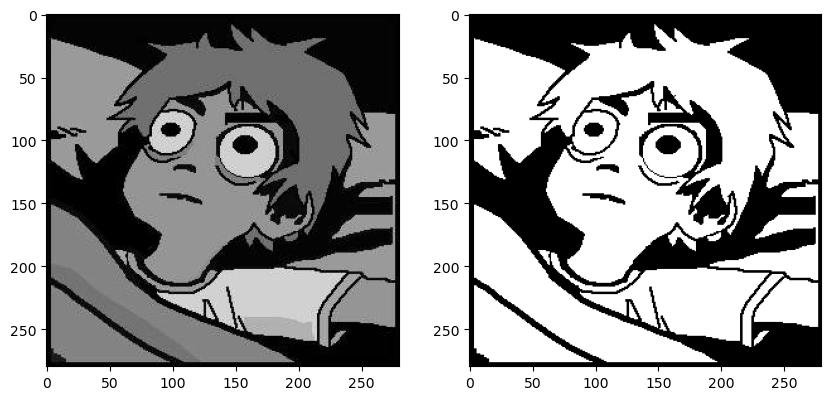

In [2]:
import cv2

import numpy as np 

import matplotlib.pyplot as plt                    

def Isodata(imagen):
    umbral=128
    while True:
        grupo1=imagen[imagen<=umbral]
        grupo2=imagen[imagen>=umbral]
        
        mediag1=np.mean(grupo1)
        mediag2=np.mean(grupo2)
        
        umbral_nuevo=(mediag1+mediag2)/2
        
        if abs(umbral_nuevo-umbral)<0.5:
            break
        umbral=umbral_nuevo
    return umbral



imagen=cv2.imread('img.jpg',0)


umbral_isodata=Isodata(imagen)

_,imagen_isodata=cv2.threshold(imagen,umbral_isodata,255,cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(imagen,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(imagen_isodata,cmap='gray')

Tecnica de 2 picos

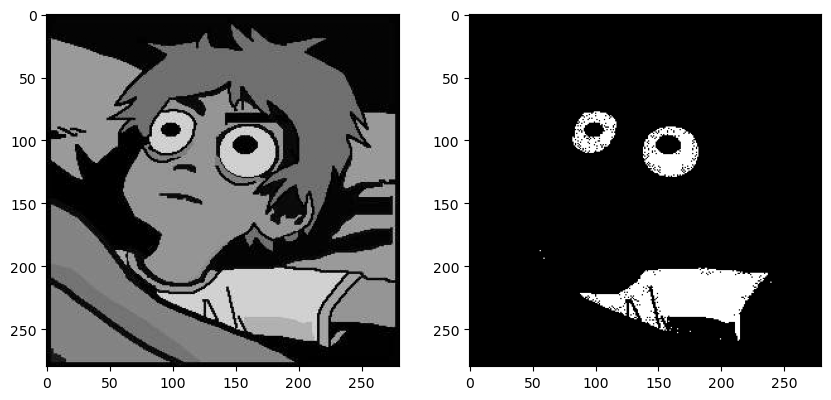

In [6]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    

def DosPicos(imagen):
    hist=cv2.calcHist([imagen],[0],None,[256],[0,256])
    pico=np.array(hist)
    pico=pico.flatten()
    pico_dif=np.diff(pico)
    primer_pico= np.argmax(pico_dif[:128])
    segundo_pico=np.argmax(pico_dif[:128])+128
    umbral_2picos=int((primer_pico+segundo_pico)/2)
    return umbral_2picos
image=cv2.imread('img.jpg',0)
umbral_2pic=DosPicos(imagen)


_,imagen_isodata=cv2.threshold(imagen,umbral_2pic,255,cv2.THRESH_BINARY)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(imagen,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(imagen_isodata,cmap='gray')


Metodo de otsu

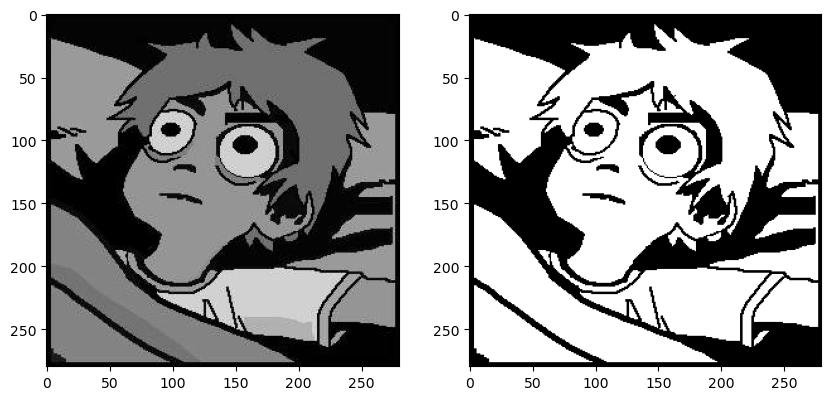

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    


image=cv2.imread('img.jpg',0)
_,imagen_otsu=cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

umbral_imagen=np.where(image>imagen_otsu,255,0).astype(np.uint8)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(imagen,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(imagen_otsu,cmap='gray')

plt.show()

Umbralizacion variable - particion de una imagen

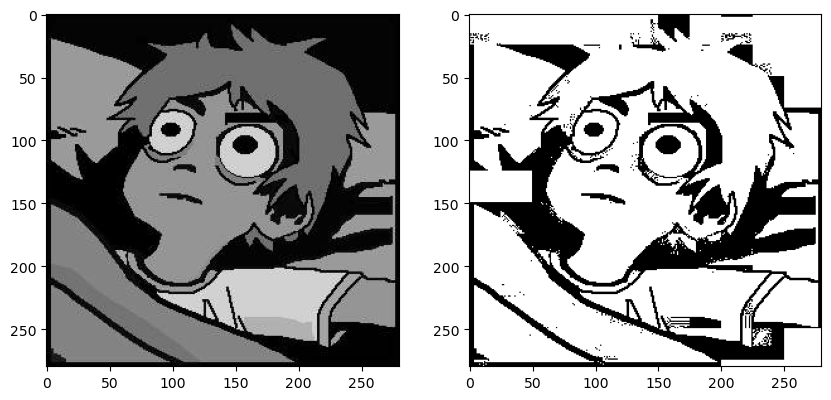

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    

def VariableNumBlok(imagen,tam_bloq,c):
    umbral_ima=np.zeros_like(imagen)
    for  y in range(0,imagen.shape[0],tam_bloq):
        for x in range(0,imagen.shape[1],tam_bloq):
            bloque=imagen[y:y +tam_bloq,x:x+tam_bloq]
            bloque_media=np.mean(bloque)
            umbral_adap=bloque_media-c
            umbral_ima[y:y+tam_bloq]
            umbral_ima[y:y+tam_bloq, x:x+tam_bloq] = (bloque > umbral_adap)*255
    return umbral_ima
    
    
image=cv2.imread('img.jpg',0)
tamBloq=25
c=10
umbra_img_adap=VariableNumBlok(image,tamBloq,c)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(image,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(umbra_img_adap,cmap='gray')

plt.show()

Con desviacion

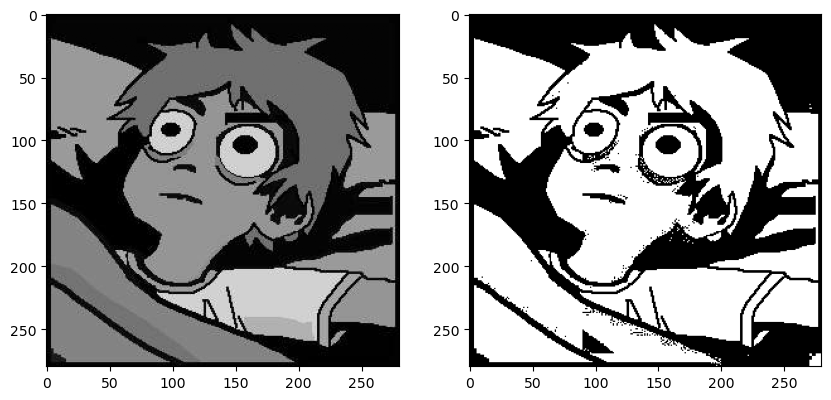

In [22]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    

def UmbraVar2(imagen,tam_bloq,ajuste):
    umbral_ima=np.zeros_like(image)
    for  y in range(0,image.shape[0],tam_bloq):
        for x in range(0,image.shape[1],tam_bloq):
            bloque=image[y:y +tam_bloq,x:x+tam_bloq]
            bloque_media=np.mean(bloque)
            des=np.std(bloque)
            umbral_adap=bloque_media-(ajuste*des)
            umbral_ima[y:y+tam_bloq, x:x+tam_bloq] = (bloque > umbral_adap)*255
    return umbral_ima
    
    
image=cv2.imread('img.jpg',0)
tamBloq=90
c=0.8
umbra_img_adap=VariableNumBlok(image,tamBloq,c)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(image,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(umbra_img_adap,cmap='gray')

plt.show()

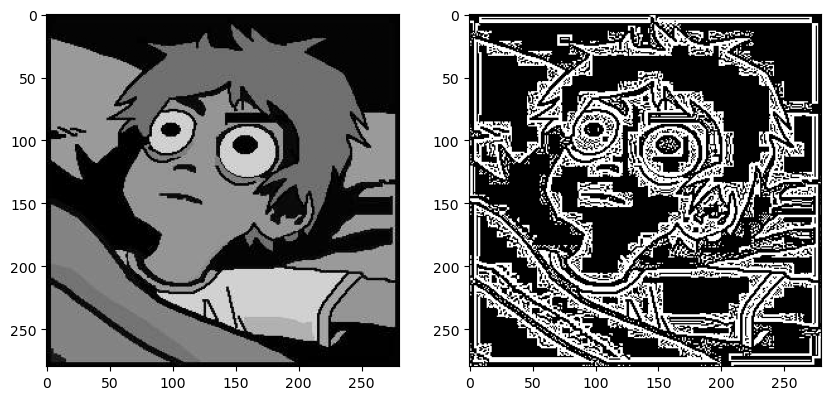

In [45]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    

def Ventana(imagen,ventana,factor):
    umbre_image=np.zeros_like(imagen)
    pad=ventana//2
    padd_image=cv2.copyMakeBorder(imagen,pad,pad,pad,pad,cv2.BORDER_REPLICATE)
    for y in range(imagen.shape[0]):
        for x in range(imagen.shape[1]):
            ventana1=padd_image[y:y+ventana,x:x+ventana]
            media=np.mean(ventana1)
            dis=np.std(ventana1)
            umbral=media-(factor*dis)
            umbre_image[y,x]=255  if imagen[y,x]>umbral else 0
    return umbre_image    



image=cv2.imread('img.jpg',0)
tamBloq=5 #siempre numero impar
c=0.1
umbra_img_adap=Ventana(image,tamBloq,c)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(image,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(umbra_img_adap,cmap='gray') 



plt.show()

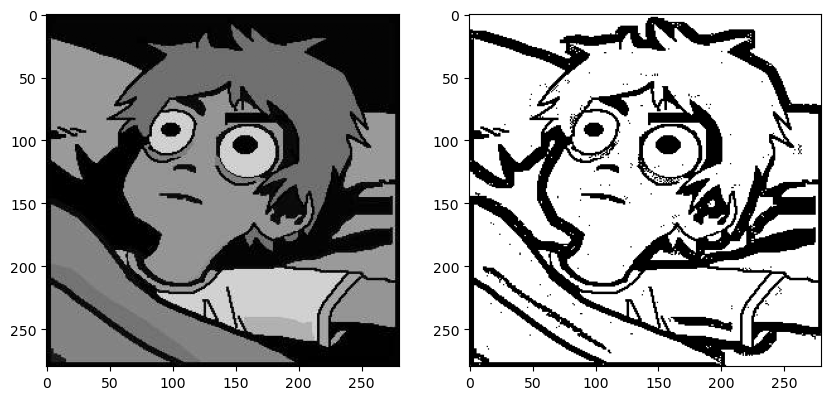

In [46]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt    

image=cv2.imread('img.jpg',0)
Ventana=15 #siempre numero impar
factor=2
umbra_img_adap=cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,Ventana,factor)


plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

plt.imshow(image,cmap='gray')

plt.subplot(1,2,2)

plt.imshow(umbra_img_adap,cmap='gray') 


plt.show()

umbralizaciones por defecto truzero con open cv

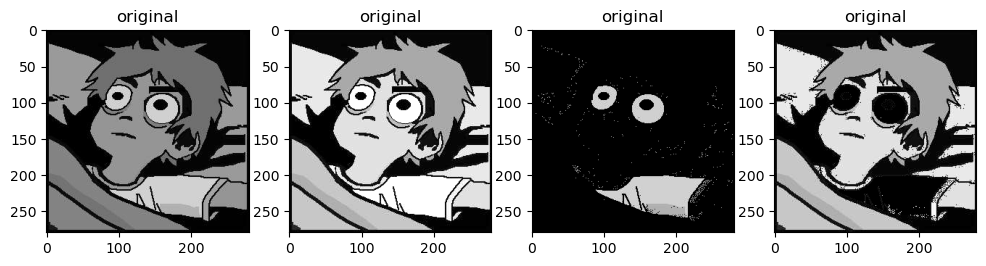

In [5]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


imagen=cv2.imread('img.jpg',0) #se lee la img en escala de grises
_,umbr_trunc=cv2.threshold(imagen,127,200,cv2.THRESH_TRUNC)
_,umbr_tozero=cv2.threshold(imagen,127,200,cv2.THRESH_TOZERO)
_,umbr_Inv=cv2.threshold(imagen,127,200,cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(12,5))

plt.subplot(1,4,1)
plt.imshow(imagen,cmap='gray')
plt.title('original')


plt.subplot(1,4,2)
plt.imshow(umbr_trunc,cmap='gray')
plt.title('original')

plt.subplot(1,4,3)
plt.imshow(umbr_tozero,cmap='gray')
plt.title('original')

plt.subplot(1,4,4)
plt.imshow(umbr_Inv,cmap='gray')
plt.title('original')


plt.show() 







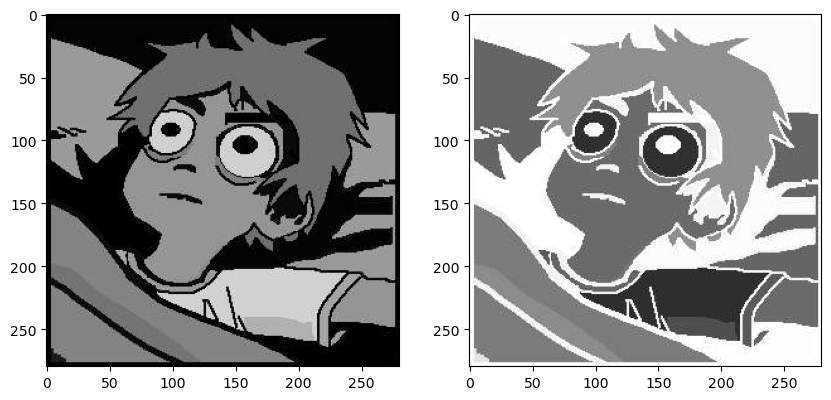

In [10]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


imagen=cv2.imread('img.jpg',cv2.IMREAD_GRAYSCALE)

img_neg=255-imagen
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(imagen,cmap='gray')
plt.subplot(122)
plt.imshow(img_neg,cmap='gray')
plt.show()



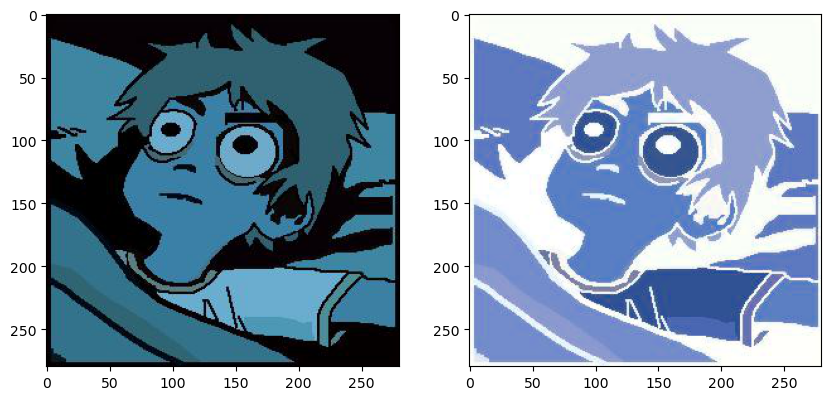

In [14]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


imagen=cv2.imread('img.jpg')

img_neg=255-imagen
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(img_neg)
plt.show()



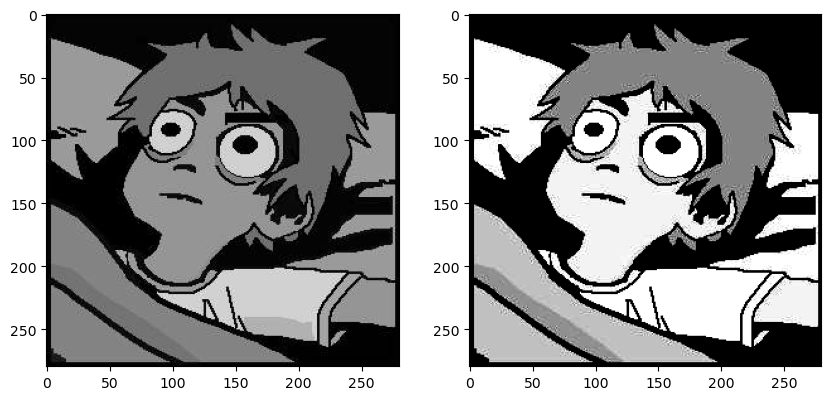

In [13]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


def contraste(img,factor=1.0):
    img=img.astype(np.float32)
    media=np.mean(img)
    img_contraste=media+(img-media)*factor
    img_contraste=np.clip(img_contraste,0,255).astype(np.uint8)
    return img_contraste

imagen=cv2.imread('img.jpg',0)
factor_contraste=4
img_nueva=contraste(imagen,factor_contraste)


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(imagen,cmap='gray')
plt.subplot(122)
plt.imshow(img_nueva,cmap='gray')
plt.show()




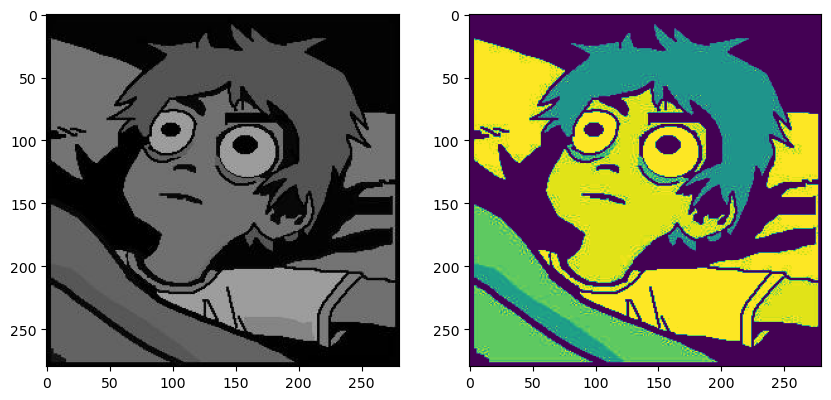

In [21]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


def contraste(img,factor=1.0):
    img=img.astype(np.float32)
    media=np.mean(img)
    img_contraste=media+(img-media)*factor
    img_contraste=np.clip(img_contraste,0,255).astype(np.uint8)
    return img_contraste

imagen=cv2.imread('img.jpg',0)
factor_contraste=4
img_nueva=contraste(imagen,factor_contraste)


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(img_nueva)
plt.show()



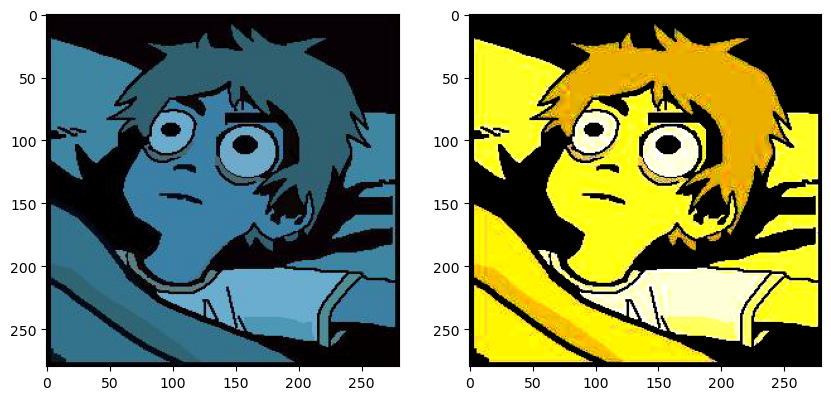

In [26]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 


def contraste_color(img,factor=1.0):
    img=img.astype(np.float32)
    for i in range(3):
        media=np.mean(img[:,:,i])
        img[:,:,i]=media+(img[:,:,i-media])*factor
        img[:,:,i]=np.clip(img[:,:,i],0,255)
    return img.astype(np.uint8)
        
        
imagen=cv2.imread('img.jpg',cv2.COLOR_BGR2RGB)
factor_contraste=4
img_nueva=contraste(imagen,factor_contraste)


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(img_nueva)
plt.show()

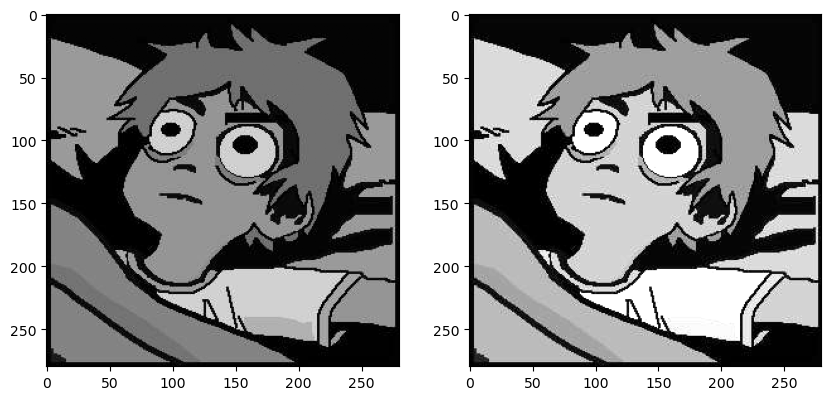

In [ ]:
import cv2

import numpy as np 

import matplotlib.pyplot as plt         


def brillo(imagen,brillo=0):
    img_brillo=imagen.astype(np.float32)+brillo
    img_brillo=np.clip(img_brillo,0,255).astype(np.uint8)
    return img_brillo

img=cv2.imread('img.jpg',0)
brillo_v=120#con valores negativos se hace mas oscuro con positivos mas claro 
img_nueva=brillo(img,brillo_v)

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.imshow(img_nueva,cmap='gray')
plt.show()


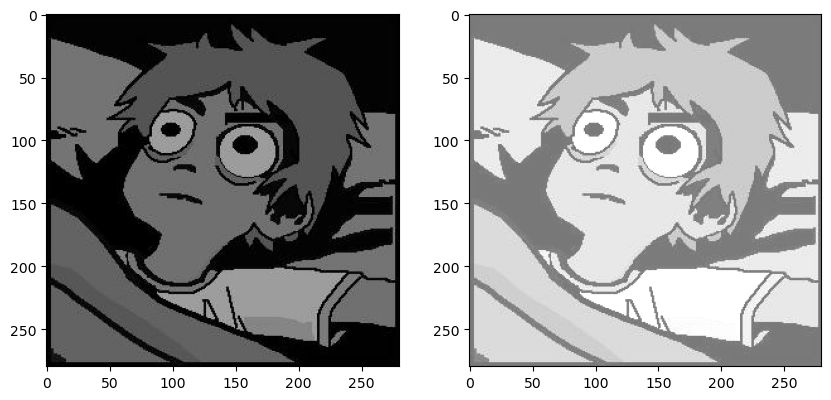

In [7]:
import cv2

import numpy as np 

import matplotlib.pyplot as plt         


def brillo(imagen,brillo=0):
    img_brillo=imagen.astype(np.float32)+brillo
    img_brillo=np.clip(img_brillo,0,255).astype(np.uint8)
    return img_brillo

img=cv2.imread('img.jpg',0)
brillo_v=120#con valores negativos se hace mas oscuro con positivos mas claro 
img_nueva=brillo(img,brillo_v)
img_color=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_result=cv2.cvtColor(img_nueva,cv2.COLOR_BGR2RGB)


plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img_color,cmap='gray')
plt.subplot(122)
plt.imshow(img_result,cmap='gray')
plt.show()


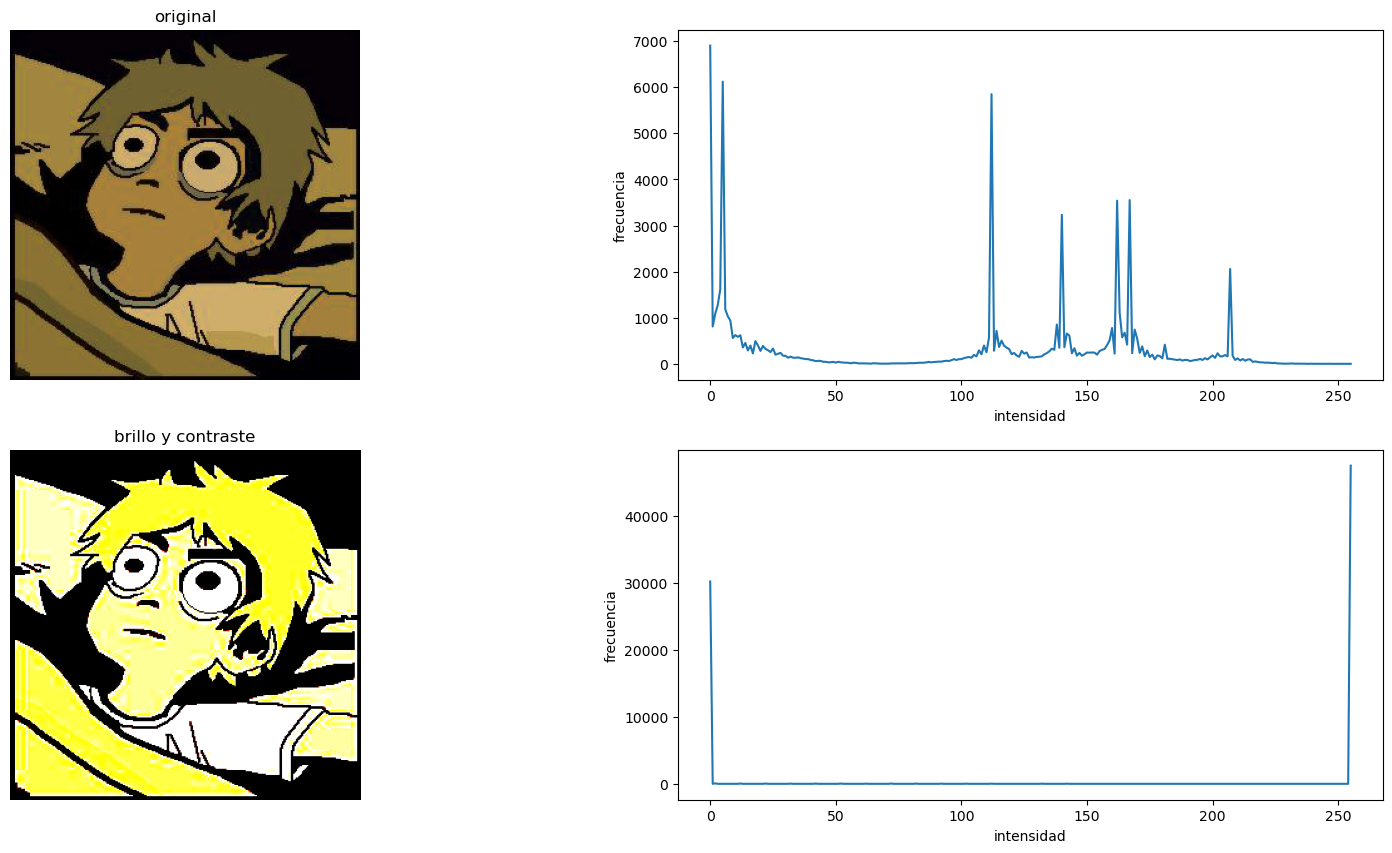

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def ajustar(img, contraste = 1.0, brillo = 0):
    img = img.astype(np.float32)
    media = np.mean(img)
    img = media + (img - media) * contraste + brillo
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

imagen = cv2.imread('img.jpg',cv2.COLOR_BGR2RGB)
factor_brillo = 200
factor_contraste = 10
img_nueva = ajustar(imagen, factor_contraste, factor_brillo)

hist1 = cv2.calcHist([imagen], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img_nueva], [0], None, [256], [0, 256])

plt.figure(figsize=(20,10))
plt.subplot(221)
plt.title('original')
plt.imshow(imagen)
plt.axis('off')

plt.subplot(222)
plt.plot(hist1)
plt.xlabel('intensidad')
plt.ylabel('frecuencia')

plt.subplot(223)
plt.title('brillo y contraste')
plt.imshow(img_nueva)
plt.axis('off')

plt.subplot(224)
plt.plot(hist2)
plt.xlabel('intensidad')
plt.ylabel('frecuencia')
plt.show()

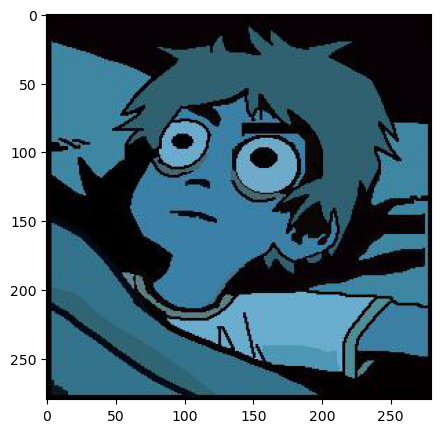

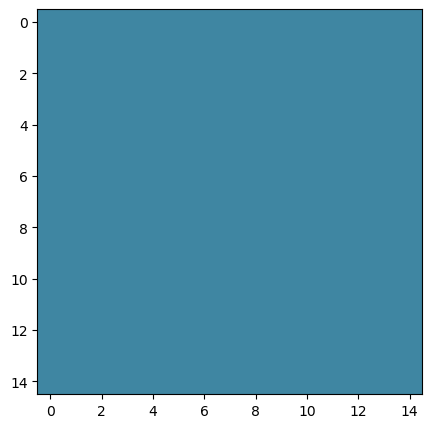

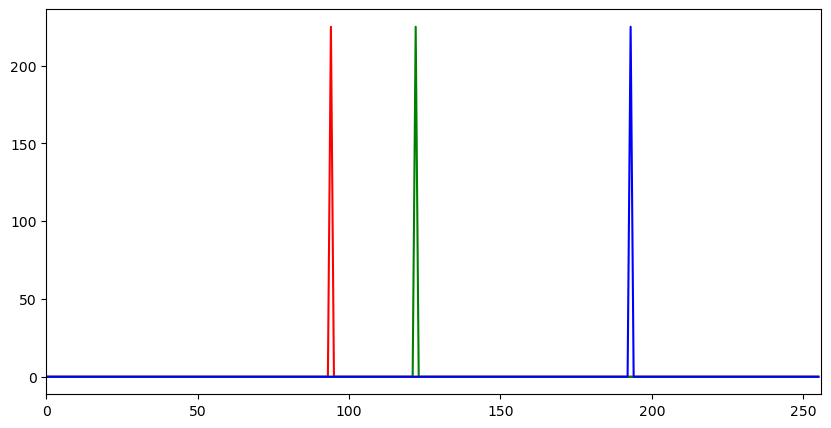

In [1]:
import cv2

import numpy as np 

import matplotlib.pyplot as plt         

plt.rcParams['figure.figsize']=[10,5]

imagen=cv2.imread('img.jpg')

imagen_rgb=cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)

plt.imshow(imagen_rgb)
plt.show()

plt.imshow(imagen_rgb[50:65,20:35,:])
plt.show()

img_cortada=imagen_rgb[50:65,20:35,:]
plt.imsave('img_cortada.jpg',img_cortada)

seccionada=cv2.imread('img_cortada.jpg')
color=('r','g','b')

for canal,col in enumerate(color):
    histograma=cv2.calcHist([seccionada*255],[canal],None,[256],[0,256])
    plt.plot(histograma,color=col)
    plt.xlim([0,256])

plt.show()



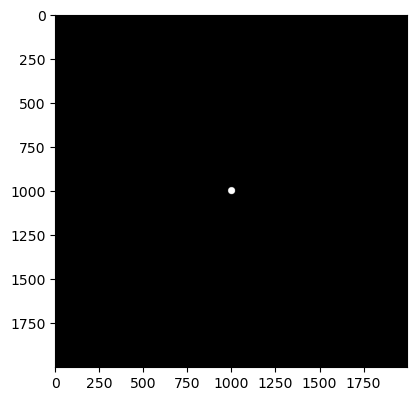

In [2]:
import cv2

import numpy as np 

import matplotlib.pyplot as plt       


img=cv2.imread('img3.jpg',0)

alto, ancho=img.shape[:2]


mascara=np.zeros_like(img)
centro=(ancho//2,alto//2)
radio=20
cv2.circle(mascara,centro,radio,(255),-1)

img_mascara=cv2.bitwise_and(img,img,mask=mascara)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_mascara,cmap='gray')  

plt.show()

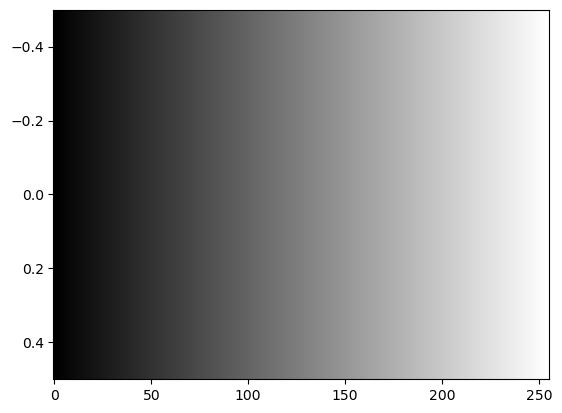

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
#definicion de colores
colores=[(0,'black'),(1,'white')]#para generar escala de grises

cmap=LinearSegmentedColormap.from_list('degradado',colores)
imagen_degra=cmap(np.linspace(0,1,256))

plt.imshow([imagen_degra],aspect='auto')

plt.show()

DEGRADADO VERTICAL

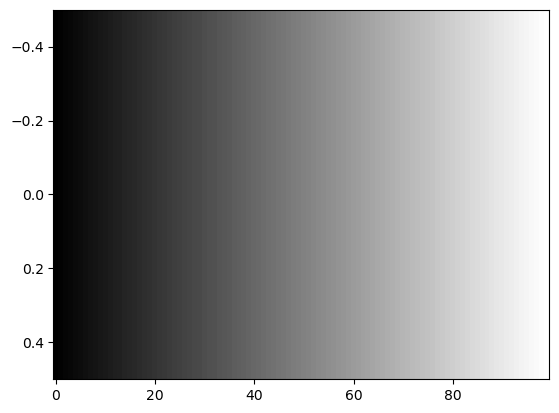

In [7]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap

# Definición de colores (escala de grises)
colores = [(0, 'black'), (1, 'white')]

# Crear el mapa de colores
cmap = LinearSegmentedColormap.from_list('degradado', colores)

# Generar la imagen con degradado
imagen_degra = np.linspace(0, 1, 100).reshape(1, -1)  # Asegurar que es 2D

# Mostrar la imagen correctamente
plt.imshow(imagen_degra, cmap=cmap, aspect='auto')

plt.show()


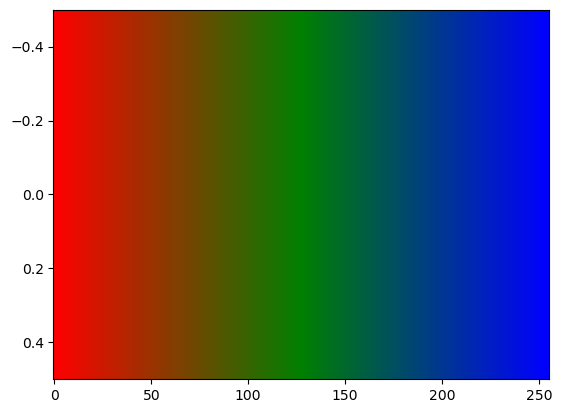

In [5]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
#definicion de colores
#colores=[(0,'black'),(1,'white')]#para generar escala de grises
colores=[(0,'red'),(0.5,'green'),(1,'blue')]


cmap=LinearSegmentedColormap.from_list('degradado',colores)
imagen_degra=cmap(np.linspace(0,1,256))

plt.imshow([imagen_degra],aspect='auto')

plt.show()

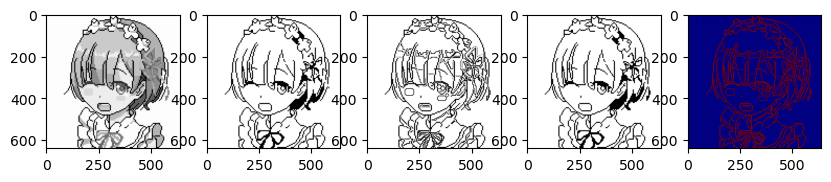

In [16]:
import matplotlib.pyplot as plt 

import cv2 


imagen=cv2.imread('img2.png',cv2.IMREAD_GRAYSCALE)

_,umbra_bi=cv2.threshold(imagen,127,255,cv2.THRESH_BINARY)
umb_adap=cv2.adaptiveThreshold(imagen,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
_,otsu=cv2.threshold(imagen,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
color=cv2.applyColorMap(umb_adap,cv2.COLORMAP_JET)
plt.figure(figsize=(10,5))


plt.subplot(1,5,1)
plt.imshow(imagen,cmap='gray')


plt.subplot(1,5,2)
plt.imshow(umbra_bi,cmap='gray')

plt.subplot(1,5,3)
plt.imshow(umb_adap,cmap='gray')


plt.subplot(1,5,4)
plt.imshow(otsu,cmap='gray')


plt.subplot(1,5,5)
plt.imshow(color,cmap='gray')


plt.show()


MASCARAS

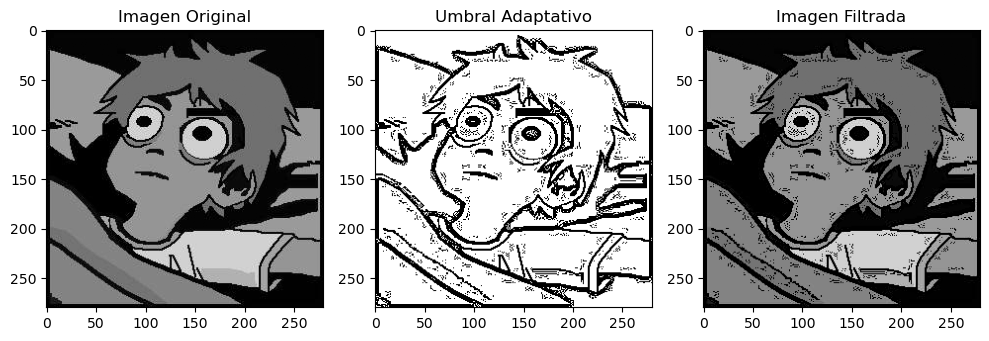

In [23]:
import matplotlib.pyplot as plt 
import cv2 

# Cargar imagen en escala de grises
imagen = cv2.imread('img.jpg', 0)

# Aplicar umbral adaptativo
umb_adap = cv2.adaptiveThreshold(imagen, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Crear máscara
maski = umb_adap == 255

# Aplicar la máscara a la imagen original
img_junta = cv2.bitwise_and(imagen, imagen, mask=umb_adap)


plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)  
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(1, 3, 2)  
plt.imshow(umb_adap, cmap='gray')
plt.title('Umbral Adaptativo')

plt.subplot(1, 3, 3)  
plt.imshow(img_junta, cmap='gray')
plt.title('Imagen Filtrada')

plt.tight_layout()  
plt.show()


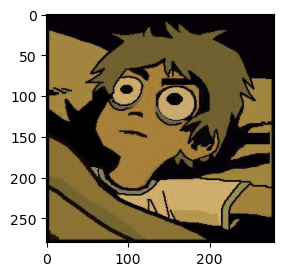

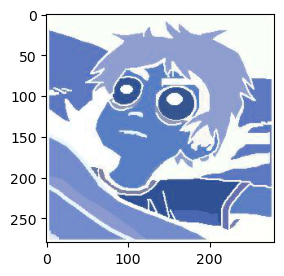

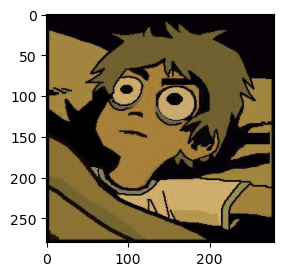

In [26]:
import cv2
import numpy as np   
import matplotlib.pyplot as plt

imagen=cv2.imread('img.jpg',cv2.COLOR_BGR2RGB)

def solarizar(imagen,umbral):
    img_sol=np.where(imagen<umbral,imagen,255-imagen)
    return img_sol

img_solarizada=solarizar(imagen,0)


imagen_negativo=255-img_solarizada

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(imagen)


plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(img_solarizada)


plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(imagen_negativo)


plt.show()

ecualizacion de un histograma se desea normalizar una imagen a un punto optimo

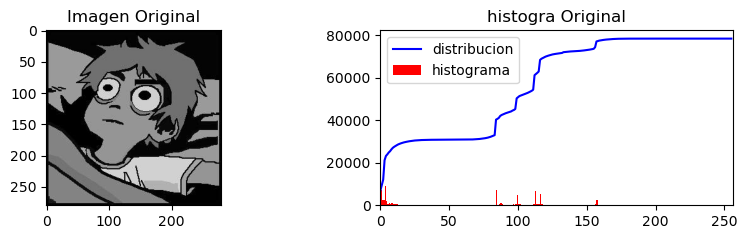

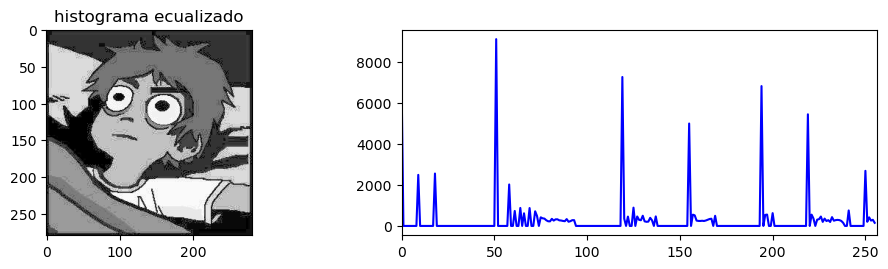

In [3]:
import cv2
import numpy as np   
import matplotlib.pyplot as plt



imagen = cv2.imread('img.jpg',0)#el 0 hace que este en escala de grises

histograma,calc=np.histogram(imagen.flatten(),256,[0,256])
distAcum=histograma.cumsum()
distAcum_normalizada=distAcum*histograma.max()/distAcum.max()

ecualizado=cv2.equalizeHist(imagen)
histograma_equ,_=np.histogram(ecualizado.flatten(),256,[0,256])


plt.figure(figsize=[10,5])
plt.subplot(2, 2, 1)  
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 2, 2)  
plt.plot(distAcum,color='b')
plt.hist(imagen.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('distribucion','histograma'),loc='upper left')
plt.title('histogra Original')

plt.figure(figsize=[10,5])
plt.subplot(2, 2,3)  
plt.imshow(ecualizado, cmap='gray')
plt.title('histograma ecualizado')

plt.subplot(2,2,4)
plt.plot(histograma_equ,color='b')
plt.xlim([0,256])
plt.tight_layout()




plt.show()





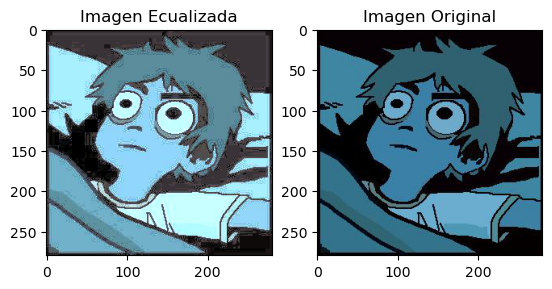

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('img.jpg')  

imagen_ycrcb = cv2.cvtColor(imagen, cv2.COLOR_BGR2YCrCb)

imagen_ycrcb[:,:,0] = cv2.equalizeHist(imagen_ycrcb[:,:,0])

ecu_color = cv2.cvtColor(imagen_ycrcb, cv2.COLOR_YCrCb2BGR)

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(ecu_color, cv2.COLOR_BGR2RGB))
plt.title("Imagen Ecualizada")


plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")

plt.show()


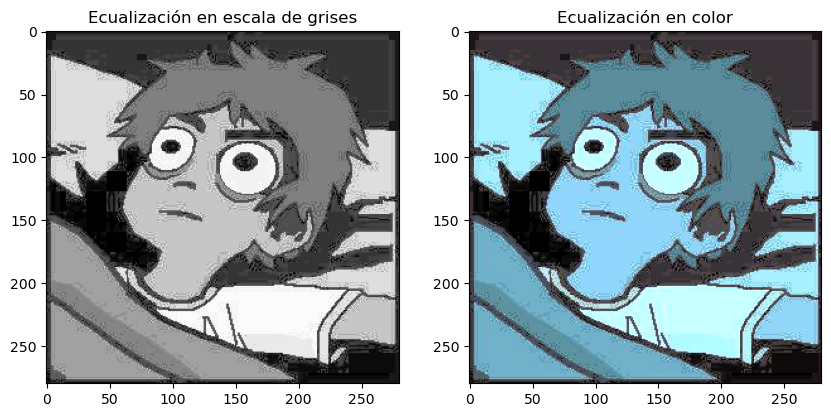

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('img.jpg', cv2.IMREAD_COLOR)

imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
ecualizada = cv2.equalizeHist(imagen_gris)

imagen_ycrcb = cv2.cvtColor(imagen, cv2.COLOR_BGR2YCrCb)
imagen_ycrcb[:, :, 0] = cv2.equalizeHist(imagen_ycrcb[:, :, 0])
ecuColor = cv2.cvtColor(imagen_ycrcb, cv2.COLOR_YCrCb2BGR)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(ecualizada, cmap='gray')
plt.title('Ecualización en escala de grises')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(ecuColor, cv2.COLOR_BGR2RGB))
plt.title('Ecualización en color')

plt.show()

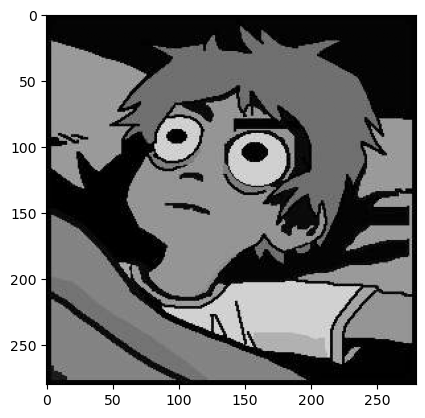

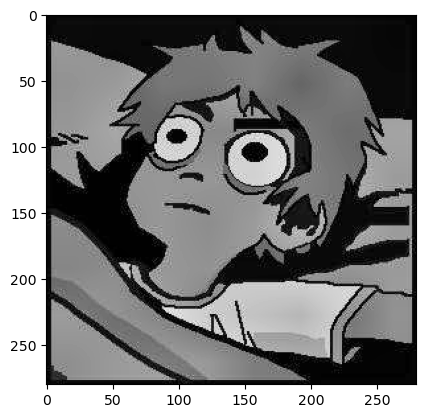

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img.jpg',0)
clip = 2.0
tiles = 8

clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=(tiles, tiles))

ecualizado = clahe.apply(image)

plt.imshow(image, cmap='gray')
plt.show()

plt.imshow(ecualizado, cmap='gray')
plt.show()

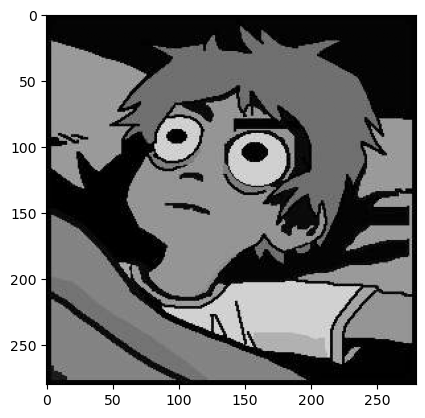

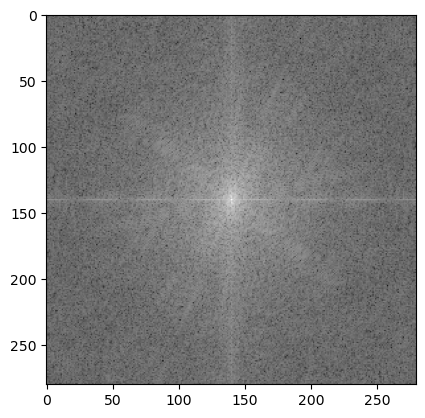

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img.jpg',0)

transformada=np.fft.fft2(image)

desplazar=np.fft.fftshift(transformada)


magnitud_espectro=np.log(1+np.abs(desplazar))

plt.imshow(image,cmap='gray')
plt.show()
plt.imshow(magnitud_espectro,cmap='gray')
plt.show()